In [1]:
import numpy as np
import pandas as pd
from numpy import array
from scipy import stats
from numpy.linalg import inv
import matplotlib.pyplot as plt
import random


In [2]:
X = pd.read_csv(r'C:\Users\madhuyen\Desktop\HEMENDRA J\Fall_2020_UNH\DSCI 6001\Final Project\F20_M4DS_project_ANN_X.csv',header=None)
Y = pd.read_csv(r'C:\Users\madhuyen\Desktop\HEMENDRA J\Fall_2020_UNH\DSCI 6001\Final Project\F20_M4DS_project_ANN_Y.csv',header=None)

print("X Shape:",X.shape)
print("Y Shape:",Y.shape)

X Shape: (201, 2)
Y Shape: (201, 1)


In [3]:
#Assign size

n_x = X.shape[1] # size of input layer`
n_h = 3 #Size of hidden layers
n_y = Y.shape[1] # size of output layer
m =len(Y)
print(n_x,n_h,n_y)
    

2 3 1


In [4]:
W1 = np.random.randn(n_x,n_h) * 0.01
b1 = np.zeros(shape=(1,n_h))
W2 = np.random.randn(n_h,n_y) * 0.01
b2 = np.zeros(shape=(1,n_y))

print(W1.shape,b1.shape,W2.shape,b2.shape)

(2, 3) (1, 3) (3, 1) (1, 1)


In [5]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([10,0,1]))

array([0.9999546 , 0.5       , 0.73105858])

In [6]:
def forwardPropogation(W1,b1,W2,b2):
    Z1 = X.dot(W1) + b1
    A1 = sigmoid_numpy(Z1)
    Z2 = A1.dot(W2) + b2
    A2 = sigmoid_numpy(Z2)
    return Z1,A1,Z2,A2

In [7]:
def computecost(A2,Y):
    logprobs = np.multiply( np.log(A2), Y) + np.multiply( (1 - Y), np.log(1 - A2) )
    return - np.sum(logprobs) / len(Y)

In [8]:
def backPropagation(Y,Z1,A1,Z2,A2,W2):
    dA2 = A2-Y
    dZ2 = dA2* A2* (1-A2)
    dW2 = A1.T.dot(dZ2)
    db2 = np.sum(dZ2,axis=0)

    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1*A1*(1-A1)
    dW1 = X.T.dot(dZ1)
    db1 = np.sum(dZ1,axis=0)

    db1 = db1.values.reshape(1,n_h)
    db2 = db2.values.reshape(1,n_y)
    
    return dW1,dW2,db1,db2

In [9]:
def updateParams(learning_rate,m,W1,W2,b1,b2,dW1,dW2,db1,db2):
    W1 = W1 - (learning_rate/m * dW1)
    W2 = W2 - (learning_rate/m * dW2)
    b1 = b1 - (learning_rate/m * db1)
    b2 = b2 - (learning_rate/m * db2)
    return W1,W2,b1,b2

In [10]:
def gradientdescentA():
    
    n_x = X.shape[1] # size of input layer`
    n_h = 3
    n_y = Y.shape[1] # size of output layer
    m =len(Y)
    #print(n_x,n_h,n_y)
    
    W1 = np.random.randn(n_x,n_h) * 0.01
    b1 = np.zeros(shape=(1,n_h))
    W2 = np.random.randn(n_h,n_y) * 0.01
    b2 = np.zeros(shape=(1,n_y))
    
    learning_rate = 10
    for i in range(100):
        Z1,A1,Z2,A2 = forwardPropogation(W1,b1,W2,b2)
        dW1,dW2,db1,db2 = backPropagation(Y,Z1,A1,Z2,A2,W2)
        cost = computecost(A2,Y)
        print("Cost in Iteration %s is %s"%(i,cost))
        W1,W2,b1,b2 = updateParams(learning_rate,m,W1,W2,b1,b2,dW1,dW2,db1,db2)

    print("Optimized parameters after 100 iterations:")
    print("\nValues of W1:\n",W1)
    print("\nValues of b1:\n",b1)
    print("\nValues of W2:\n",W2)
    print("\nValues of b2:\n",b2)
    return forwardPropogation(W1,b1,W2,b2)

In [11]:
#Predictions with optimized parameters
#A2 gives the predicted output values, which is the 4th parameter returned by forwardPropogation.
predictions = gradientdescentA()
print("\nA2 gives the predicted output values, which is the 4th parameter returned by forwardPropogation.\n",predictions[3])

Cost in Iteration 0 is 0    0.693136
dtype: float64
Cost in Iteration 1 is 0    0.693116
dtype: float64
Cost in Iteration 2 is 0    0.693107
dtype: float64
Cost in Iteration 3 is 0    0.693094
dtype: float64
Cost in Iteration 4 is 0    0.693075
dtype: float64
Cost in Iteration 5 is 0    0.693049
dtype: float64
Cost in Iteration 6 is 0    0.693011
dtype: float64
Cost in Iteration 7 is 0    0.692956
dtype: float64
Cost in Iteration 8 is 0    0.692877
dtype: float64
Cost in Iteration 9 is 0    0.692764
dtype: float64
Cost in Iteration 10 is 0    0.692602
dtype: float64
Cost in Iteration 11 is 0    0.692368
dtype: float64
Cost in Iteration 12 is 0    0.692033
dtype: float64
Cost in Iteration 13 is 0    0.691552
dtype: float64
Cost in Iteration 14 is 0    0.690863
dtype: float64
Cost in Iteration 15 is 0    0.68988
dtype: float64
Cost in Iteration 16 is 0    0.688481
dtype: float64
Cost in Iteration 17 is 0    0.686501
dtype: float64
Cost in Iteration 18 is 0    0.683717
dtype: float64
Cost

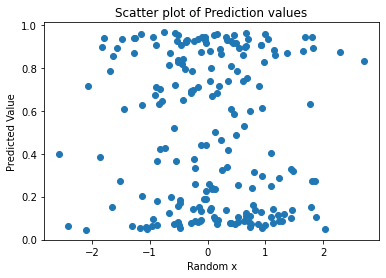

In [12]:
import matplotlib.pyplot as plt
x = np.random.randn(201,1)

plt.scatter(x,predictions[3])
plt.title("Scatter plot of Prediction values")
plt.xlabel('Random x')
plt.ylabel('Predicted Value')
plt.show()